In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-04-10 17:28:13.418495


Getting the Data

In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-04-10 17:28:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.16.59, 216.58.209.27, 142.250.203.155, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.16.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.7MB/s    in 3.6s    

2025-04-10 17:28:17 (28.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
import os

3# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [5]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off") # Turn off axis
    print(f"Image shape: {img.shape}") # Show the shape of the image
    return img

Image shape: (442, 512, 3)


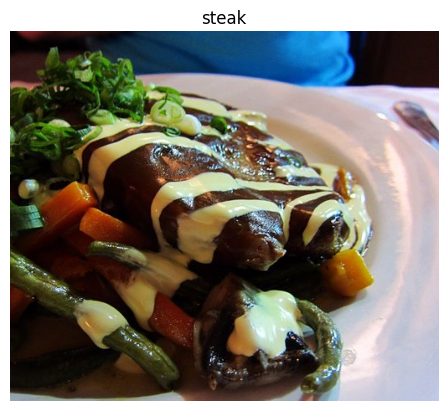

In [7]:
# View random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [8]:
# View the img (actually just a big array/tensor)
img

array([[[  7,   1,   3],
        [  7,   1,   3],
        [  6,   0,   4],
        ...,
        [ 28,  10,   8],
        [ 32,  14,  12],
        [ 36,  18,  16]],

       [[  7,   1,   3],
        [  6,   2,   3],
        [  5,   0,   4],
        ...,
        [ 31,  13,  11],
        [ 32,  14,  12],
        [ 32,  14,  12]],

       [[  6,   2,   3],
        [  4,   2,   3],
        [  3,   1,   2],
        ...,
        [ 34,  16,  14],
        [ 32,  14,  12],
        [ 29,  11,   9]],

       ...,

       [[155, 172, 180],
        [151, 168, 178],
        [148, 165, 175],
        ...,
        [192, 203, 231],
        [194, 205, 233],
        [197, 208, 236]],

       [[152, 167, 174],
        [154, 169, 176],
        [154, 168, 177],
        ...,
        [190, 201, 229],
        [190, 204, 231],
        [193, 207, 234]],

       [[153, 166, 172],
        [155, 168, 174],
        [155, 168, 177],
        ...,
        [190, 201, 229],
        [190, 204, 231],
        [193, 207, 234]]

In [9]:
# View the image shape
img.shape # returns (width, height, colour channels)

(442, 512, 3)

In [10]:
img/255

array([[[0.02745098, 0.00392157, 0.01176471],
        [0.02745098, 0.00392157, 0.01176471],
        [0.02352941, 0.        , 0.01568627],
        ...,
        [0.10980392, 0.03921569, 0.03137255],
        [0.1254902 , 0.05490196, 0.04705882],
        [0.14117647, 0.07058824, 0.0627451 ]],

       [[0.02745098, 0.00392157, 0.01176471],
        [0.02352941, 0.00784314, 0.01176471],
        [0.01960784, 0.        , 0.01568627],
        ...,
        [0.12156863, 0.05098039, 0.04313725],
        [0.1254902 , 0.05490196, 0.04705882],
        [0.1254902 , 0.05490196, 0.04705882]],

       [[0.02352941, 0.00784314, 0.01176471],
        [0.01568627, 0.00784314, 0.01176471],
        [0.01176471, 0.00392157, 0.00784314],
        ...,
        [0.13333333, 0.0627451 , 0.05490196],
        [0.1254902 , 0.05490196, 0.04705882],
        [0.11372549, 0.04313725, 0.03529412]],

       ...,

       [[0.60784314, 0.6745098 , 0.70588235],
        [0.59215686, 0.65882353, 0.69803922],
        [0.58039216, 0

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocessing data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)  

#Set up the train and test directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        verbose = 0)


2025-04-10 17:28:20.265276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-10 17:28:20.379599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-10 17:28:20.416057: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 17:28:20.611870: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


I0000 00:00:1744306104.988221    1390 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744306105.378705    1390 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744306105.378756    1390 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744306105.404205    1390 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744306105.404257    1390 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

<Axes: title={'center': 'Non-normalized Data'}>

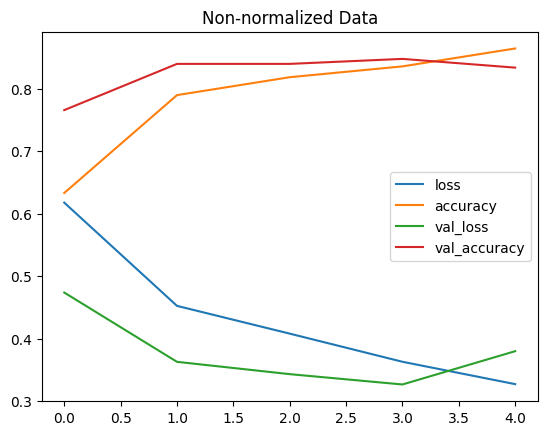

In [12]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_1.history).plot(title="Non-normalized Data")

In [13]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

 6/47 [==>...........................] - ETA: 1s - loss: 0.6943 - accuracy: 0.4531

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


47/47 [==============================] - 5s 82ms/step - loss: 0.6930 - accuracy: 0.4900 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 3s 66ms/step - loss: 0.6989 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 3s 64ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 3s 67ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 3s 62ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 4)                 602116    
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

 4/47 [=>............................] - ETA: 0s - loss: 8.5275 - accuracy: 0.5859 

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


47/47 [==============================] - 4s 68ms/step - loss: 3.8806 - accuracy: 0.6153 - val_loss: 1.4815 - val_accuracy: 0.6140
Epoch 2/5
47/47 [==============================] - 3s 60ms/step - loss: 0.9423 - accuracy: 0.7080 - val_loss: 0.7460 - val_accuracy: 0.6500
Epoch 3/5
47/47 [==============================] - 3s 64ms/step - loss: 0.7725 - accuracy: 0.7200 - val_loss: 0.7689 - val_accuracy: 0.6900
Epoch 4/5
47/47 [==============================] - 3s 63ms/step - loss: 0.5801 - accuracy: 0.7507 - val_loss: 0.8594 - val_accuracy: 0.6600
Epoch 5/5
47/47 [==============================] - 3s 62ms/step - loss: 0.6261 - accuracy: 0.7473 - val_loss: 0.4359 - val_accuracy: 0.7980


In [20]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_11 (Dense)            (None, 100)               15052900  
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


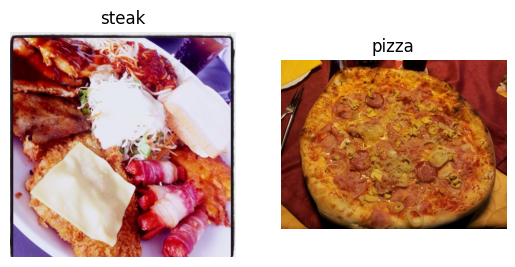

In [21]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

Preprocessing data

In [22]:
#Define trainging and test data folder paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


In [23]:
# Create train and test data generators and normalize data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
#turn data into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",) #categorical if more than 2 classes                                              

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
